In [1]:
from IPython.display import FileLink
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow_addons as tfa
from tensorflow.keras import layers, losses, optimizers, Model, Sequential, activations, models
from volumentations import *
from dataloader import prepare_dataset
from models import *
from utils import plot_slices

2023-07-31 08:42:53.204019: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-31 08:42:53.431402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 08:42:54.612282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/user/miniconda3/envs/zomar_venv/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and rele

In [2]:
TFRecord_filenames = [
    "./tfrecords/tsdc_abus_0.tfrec",
    "./tfrecords/tsdc_abus_1.tfrec",
    "./tfrecords/tsdc_abus_2.tfrec",
    "./tfrecords/tsdc_abus_3.tfrec",
    "./tfrecords/tsdc_abus_4.tfrec",
]


train_args = {
    "learning_rate": 4e-4,
    "len_data": 80,
    "batch_size": 2,
    "epochs": 20,
    "warmup_epoch_percentage": 0.1,
}
swin_args = {
    "input_shape": (64, 64, 64, 1),
    "embed_dim": 48,
    "window_size": [7, 7, 7],
    "patch_size": [4, 4, 4],
    "mask_ratio": 0.01,
    "depths": [2, 2, 2, 2],
    "mlp_ratio": 4.0,
    "num_heads": [3, 6, 12, 24],
    "patch_norm": True,
    "qkv_bias": True,
    "drop_path": 0.5,
    "attn_drop": 0.0,
    "proj_drop": 0.0,
}

In [3]:
vl_ds = prepare_dataset(
    TFRecord_filenames[-1], batch_size=1, patch_size=swin_args["input_shape"][:-1]
)


2023-07-31 08:43:01.867073: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12462 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:60:00.0, compute capability: 7.5
2023-07-31 08:43:01.869033: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13618 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5
2023-07-31 08:43:01.870721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 13618 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:86:00.0, compute capability: 7.5
2023-07-31 08:43:01.872363: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 13618 MB memory:  -> device: 3, name: Tesla T4, pci bus id: 0000:da:00.0, compute capability: 7.5
2023-07-

In [ ]:
swin_args = {
    "input_shape": (64, 64, 64, 1),
    "embed_dim": 48,
    "window_size": [7, 7, 7],
    "patch_size": [4, 4, 4],
    "mask_ratio": 0.01,
    "depths": [2, 2, 2, 2],
    "mlp_ratio": 4.0,
    "num_heads": [3, 6, 12, 24],
    "patch_norm": True,
    "qkv_bias": True,
    "drop_path": 0.5,
    "attn_drop": 0.0,
    "proj_drop": 0.0,
}

xnet = get_XNet(**swin_args)
xnet.load_weights("fold1_xnet_cls_w7_p4_e48.keras")



In [6]:
# model.save("./temp.keras")
model = None
model = models.load_model("fold1_xnet_cls_w7_p4_e48.keras")


tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


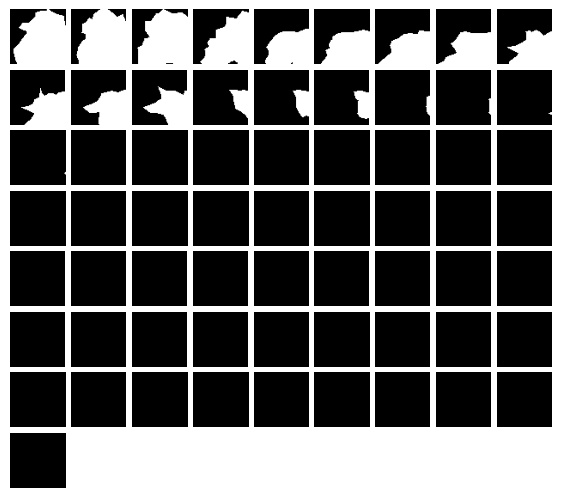

In [21]:
for x,y,c in vl_ds:
    inp = np.copy(x)
    pred,cls = model(inp)
    print(c)
    
    plot_slices(y[0,:,:,:,0],figsize=7)
    break

tf.Tensor([[0.5623437]], shape=(1, 1), dtype=float32)


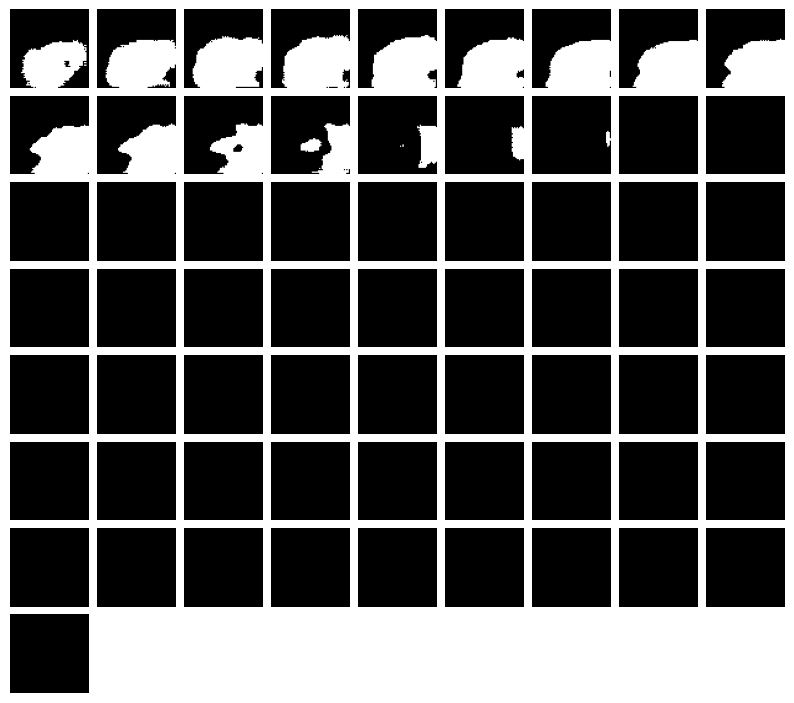

In [24]:
pred,cls = model(inp)
print(tf.nn.sigmoid(cls))
plot_slices(np.round(tf.nn.sigmoid(pred[0,:,:,:,0])),figsize=10)
# plot_slices(tf.nn.sigmoid(pred[0][0,:,:,:,0])>.5,figsize=7)

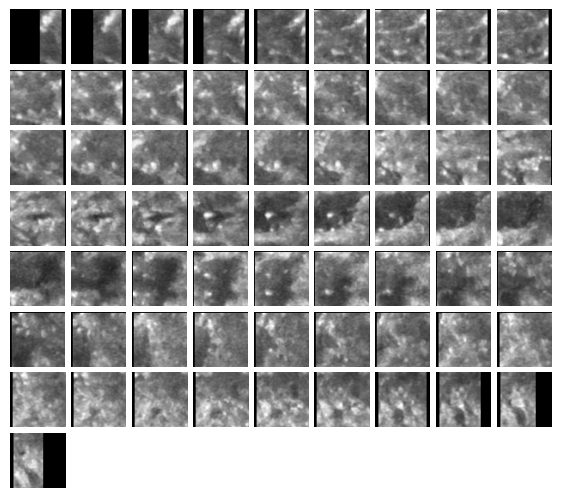

In [20]:
plot_slices(inp[0,:,:,:,0],figsize=7)
